In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn1 = pd.read_csv("Churn-Modelling.csv")

In [3]:
churn1.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
####Different types of Variables

cat_features = ['Geography', 'HasCrCard', "IsActiveMember", "Gender"]
float_features = ['Balance',  "EstimatedSalary"]
int_features = ["Age", 'CreditScore', 'Tenure', 'NumOfProducts']
useless = ['RowNumber','CustomerId', 'Surname']
target = "Exited"

In [18]:
#Are any variables missing?
churn_missing = churn1.isna().sum()
churn_missing

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
churn1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
churn1=churn1.drop(useless,axis =1)

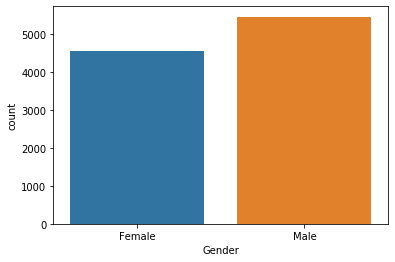

In [21]:
sns.countplot (x= 'Gender', data = churn1)
#This graph shows that there are more males than females in the churn dataset

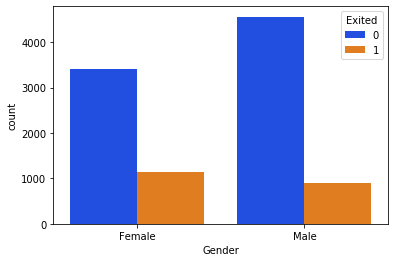

In [22]:
sns.countplot(x= 'Gender', data = churn1, hue = 'Exited', palette = 'bright')
#This graph shows that more males stayed, compared to females 

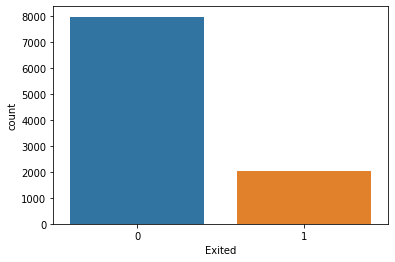

In [23]:
sns.countplot(x= 'Exited', data = churn1)
#There are about 8,000 people who stayed

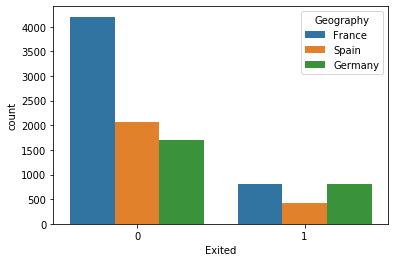

In [24]:
graph1 =sns.countplot(x='Exited', data = churn1, hue = 'Geography')
#There is a lot of French people that stayed 

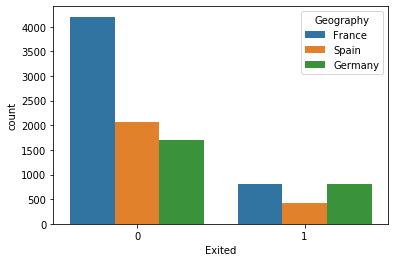

In [25]:
graph2 = sns.countplot(churn1[target], hue = churn1['Geography'])
#There is a lot of French people that stayed 

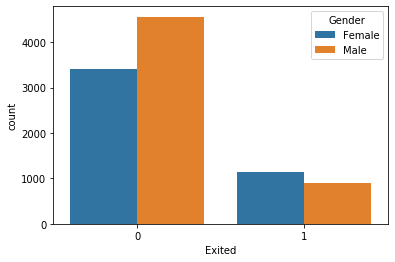

In [26]:
sns.countplot(x = 'Exited', data = churn1, hue = 'Gender')
#both males and females stayed 

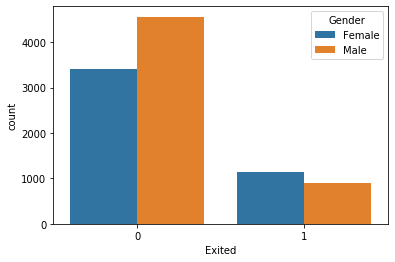

In [27]:
graph3 = sns.countplot(churn1[target], hue = churn1["Gender"])
##both males and females stayed 

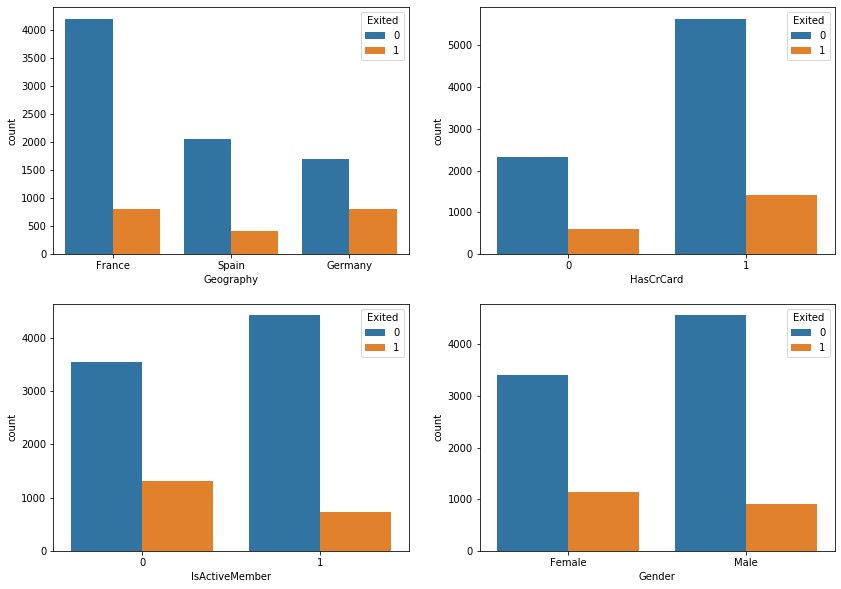

In [28]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(14,10))

for feature, ax in zip(cat_features, axes.flat):
    plot = sns.countplot(x=feature, hue= target, data =churn1, ax=ax)
    #top left graph showd that french,spinish, and german people stayed, compared to those who exited
    #top right graph shows that those the majority who exited had a credit card
    #bottom left graph shows that those who were an active member, didn't exit 
    #bottom right graph showed that showed that regardless of gender, many people stayed 

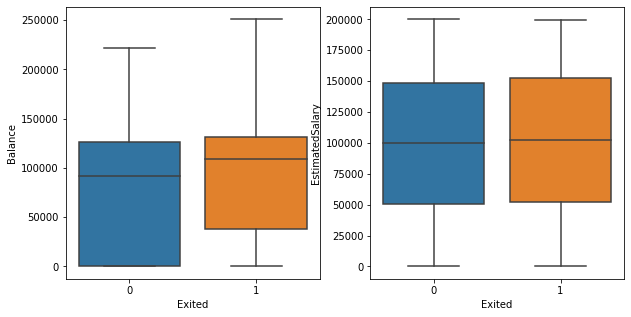

In [29]:
fig, axes = plt.subplots(ncols = 2, nrows= 1, figsize =(10,5))

for feature, ax in zip(float_features, axes. flat):
    plot = sns.boxplot (x=target, y = feature, data = churn1, ax =ax, showfliers= False)
    #left graph shows the median of the those who stayed was just lower than 100,000 while those who exited had a higher balance
    #right graph shows that regardless of if they stayed or not, the estimated salary was about the same 

In [30]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [31]:
churn_dropped = churn1.drop(cat_features, axis = 1)
churn_dropped.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0


In [ ]:
Geography = pd.get_dummies(churn1.Geography).iloc[:, 1:]
Gender =pd.get_dummies(churn1.Gender).iloc[:,1:]

In [ ]:
Geography.head()

In [ ]:
churn_fixed = pd.concat([churn_dropped,Geography,Gender], axis =1)

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split

In [36]:
x = churn_fixed.drop("Exited", axis = 1)
y = churn_fixed["Exited"]

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [40]:
log_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = log_model.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
cm = confusion_matrix(y_test, predictions)
cm

array([[2353,   56],
       [ 555,   36]])

In [67]:
accuracy_score(predictions,y_test)

0.7963333333333333

In [68]:
from sklearn.metrics import classification_report

In [69]:
classification_report(predictions, y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      0.81      0.89      2908\n           1       0.06      0.39      0.11        92\n\n    accuracy                           0.80      3000\n   macro avg       0.52      0.60      0.50      3000\nweighted avg       0.95      0.80      0.86      3000\n'

In [70]:
print ("The Logistic Regression model showed 2360 correct positives and 16 false negatives with an accuracy of 79%")

The Logistic Regression model showed 2360 correct positives and 16 false negatives with an accuracy of 79%


In [71]:
##Decision Tree Modelling

In [72]:
churn_tree = churn_fixed[:]

In [73]:
churn_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 576.3 KB


In [74]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [75]:
print (x_test.shape, x_train.shape)
print (y_test.shape, y_train.shape)

(3000, 9) (7000, 9)
(3000,) (7000,)


In [76]:
from sklearn.tree import DecisionTreeClassifier
ModelTree = DecisionTreeClassifier(max_depth =3)
from sklearn import tree

In [77]:
ModelTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
prediction = ModelTree.predict(x_test)

In [79]:
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
dataframe = pd.DataFrame(prediction, y_test)

In [81]:
dataframe

,0
Exited,
0,0
1,0
1,0
0,1
0,0
...,...
0,0
0,0
0,1


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [83]:
accuracy_score(prediction,y_test)

0.8213333333333334

In [84]:
confusion_matrix(prediction,y_test)

array([[2139,  269],
       [ 267,  325]])

In [85]:
classification_report(prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89      2408\n           1       0.55      0.55      0.55       592\n\n    accuracy                           0.82      3000\n   macro avg       0.72      0.72      0.72      3000\nweighted avg       0.82      0.82      0.82      3000\n'

In [86]:
print ("The Decision tree model has 2435 correctly classified data points, with a accurary of 84%")

The Decision tree model has 2435 correctly classified data points, with a accurary of 84%


In [87]:
from sklearn.tree import plot_tree

In [88]:
features = list(churn_tree)
features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Exited',
 'Germany',
 'Spain',
 'Male']

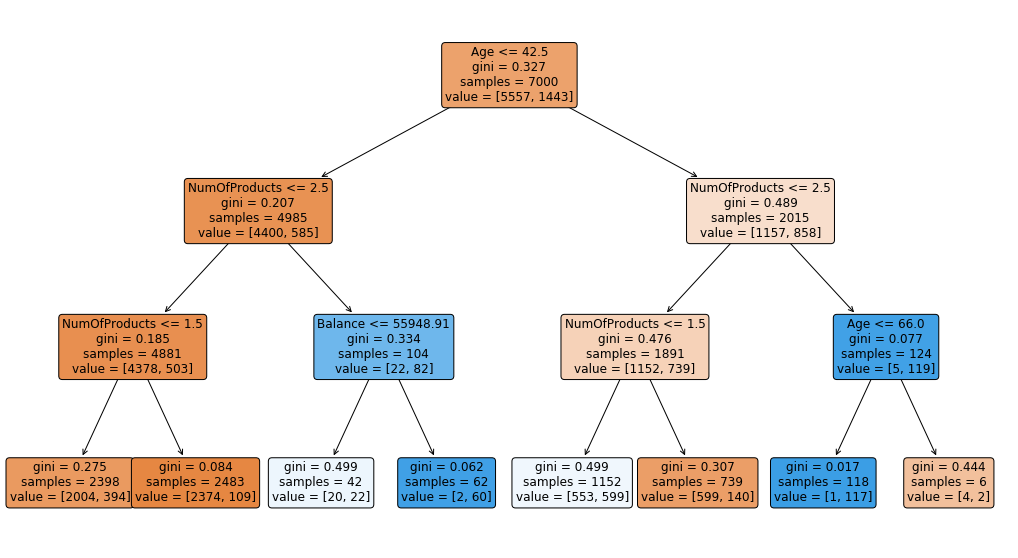

In [94]:
#My Decision Tree 
plt.figure(figsize=(18,10))
a = plot_tree(ModelTree, feature_names = features, filled = True, rounded = True, fontsize = 12)

In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
churnNB = GaussianNB()

In [97]:
train, test = train_test_split(churn_fixed, test_size = 0.3)
print(train.shape)
print(test.shape)
x_train= train[churn_fixed.columns]
y_train= train['Exited']
testx = test[churn_fixed.columns]
testy = test['Exited']
print(x_train.shape,y_train.shape )
print(testx.shape, testy.shape)

(7000, 10)
(3000, 10)
(7000, 10) (7000,)
(3000, 10) (3000,)


In [98]:
churnNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
predicted_churn= churnNB.predict(testx)
expected_churn = testy

In [100]:
accuracy_score(predicted_churn,expected_churn)

0.7893333333333333

In [101]:
Churn_print = confusion_matrix(expected_churn, predicted_churn)
Churn_print

array([[2313,   76],
       [ 556,   55]])

In [102]:
print ("The Naive Bayes model shows 2390 correct datasets with an accuracy of 78%")

The Naive Bayes model shows 2390 correct datasets with an accuracy of 78%


In [103]:
print ("The most accurate model is the Decision Tree model with an accuracy of 84%")

The most accurate model is the Decision Tree model with an accuracy of 84%
